In [2]:
import sys
import argparse
import os
import time
import math
import configparser

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
home_path = './'
lcfFile = home_path + "TSV3D_lcf.csv"
ConfigFile = home_path + "TSV3D.config"
TSVpath = home_path + 'flp_files/TSV_flp.csv'
SimParamsFile = home_path + "SimParms.config",
gridSteadyFile = home_path + "results/trial.out"
lcf_df = pd.read_csv(lcfFile, lineterminator="\n")

In [15]:
tsv['X']

0      0.0001
1      0.0001
2      0.0001
3      0.0001
4      0.0001
        ...  
111       TSV
112         5
113         3
114     1e-05
115       TSV
Name: X, Length: 116, dtype: object

In [19]:
tsv = pd.read_csv(TSVpath, lineterminator="\n")
for i in range(8):
    for j in range(8):
        tsv.loc[i*10+j,"TSVIndex"] = i*10+j
        tsv.loc[i*10+j,"X"] = i*1e-4+5e-4
        tsv.loc[i*10+j,"Y"] = j*1e-4+5e-4
tsv["BotLayer"] = 5
tsv["TopLayer"] = 3
tsv["Radius (m)"] = 1.5e-5
tsv["Label"] = 'TSV'
tsv.to_csv(TSVpath, index=False)

In [1]:
for i in range(lcf_df.shape[0]):
    if lcf_df["Main_compo"][i]=="Diel":
        lcf_df.loc[i,"Clip_num_x"] = int(4)
        lcf_df.loc[i,"Clip_num_y"] = int(4)
        lcf_df.loc[i,"Clip_num_z"] = int(1)
    elif lcf_df["Main_compo"][i]=="Metal":
        lcf_df.loc[i,"Clip_num_x"] = int(4)
        lcf_df.loc[i,"Clip_num_y"] = int(4)
        lcf_df.loc[i,"Clip_num_z"] = int(2)
lcf_df["Clip_num_x"] = lcf_df["Clip_num_x"].astype('int32')
lcf_df["Clip_num_y"] = lcf_df["Clip_num_y"].astype('int32')
lcf_df["Clip_num_z"] = lcf_df["Clip_num_z"].astype('int32')
lcf_df.to_csv(lcfFile, index=False)

NameError: name 'lcf_df' is not defined

In [9]:
for i in range(lcf_df['FloorplanFile'].shape[0]):
    flp_df = pd.read_csv(lcf_df['FloorplanFile'][i])
    flp_df = flp_df.reindex(columns=['UnitName', 'X', 'Y', 'Z', 'Length (m)', 
                                     'Width (m)', 'Thickness (m)', 'ConfigFile', 'Label'])
    flp_df['Z'] = 0
    flp_df['Thickness (m)'] = lcf_df.iloc[i]["Thickness (m)"]
    flp_df.to_csv(lcf_df['FloorplanFile'][i], index=False)

5000

In [19]:
Power_origin = ["./ptrace_files/M3D_tier1_ptrace-Copy1.csv", "./ptrace_files/M3D_tier0_ptrace-Copy1.csv"]
Fileidx = [23,33]
for idx in range(2):
    power_df = pd.read_csv(Power_origin[idx])
    power_AT = power_df.reindex(columns=['UnitName', 'Power_dyn', 'Power_leak'])
    power_AT['UnitName'] = power_df['UnitName']
    power_AT['Power_dyn'] = power_df['Power'] * 1 #(np.random.rand(power_df['Power'].size)+0.5)
    power_AT['Power_leak'] = power_df['Power'] * 0# * (np.random.randint(10)+10)/10
    power_AT.to_csv(lcf_df['PowerFile'][Fileidx[idx]], index=False)

In [34]:
print(lcf_df['FloorplanFile'][22], lcf_df['PowerFile'][22])
flp_df = pd.read_csv(lcf_df['FloorplanFile'][22])
power_df = pd.read_csv(lcf_df['PowerFile'][22])
name = flp_df['UnitName']
print(flp_df['UnitName'], power_df['UnitName'])
x = flp_df['UnitName']==power_df["UnitName"]
print(x.unique())

../M3D/flp_files/M3D_10mm_tier1_flp.csv ../M3D/ptrace_files/M3D_tier1_ptrace.csv
0         T1_Unit_0_0
1         T1_Unit_0_1
2         T1_Unit_0_2
3         T1_Unit_0_3
4         T1_Unit_0_4
            ...      
2495    T1_Unit_49_45
2496    T1_Unit_49_46
2497    T1_Unit_49_47
2498    T1_Unit_49_48
2499    T1_Unit_49_49
Name: UnitName, Length: 2500, dtype: object 0         T0_Unit_0_0
1         T0_Unit_0_1
2         T0_Unit_0_2
3         T0_Unit_0_3
4         T0_Unit_0_4
            ...      
2495    T0_Unit_49_45
2496    T0_Unit_49_46
2497    T0_Unit_49_47
2498    T0_Unit_49_48
2499    T0_Unit_49_49
Name: UnitName, Length: 2500, dtype: object
[False]


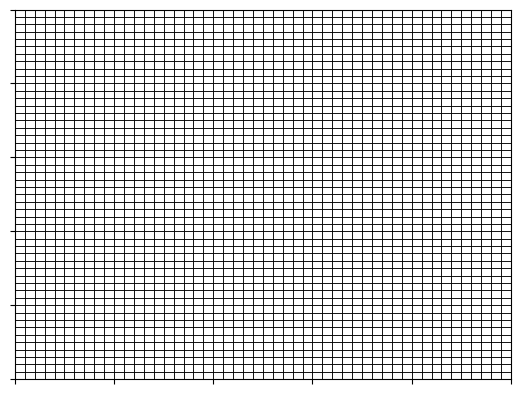

In [19]:
flp_df = pd.read_csv(lcf_df['FloorplanFile'][1])
fig, ax = plt.subplots()
for i in range(flp_df.shape[0]):
    name = flp_df.iloc[i]['UnitName']
    x, y = flp_df.iloc[i]["X"], flp_df.iloc[i]["Y"]
    length, width = flp_df.iloc[i]["Length (m)"], flp_df.iloc[i]["Width (m)"]
    rect = plt.Rectangle((x, y), length, width, linewidth=0.5, edgecolor='k', facecolor='none')
    ax.add_patch(rect)
    #ax.text(x + 0.5*length, y+ 0.5 * width, i, ha='center', va='center')

ax.set_xlim(0, 0.01); ax.set_ylim(0, 0.01)
#ax.set_xticks(range(12))
#ax.set_yticks(range(7))
ax.set_xticklabels([])
ax.set_yticklabels([])

# 显示图形
plt.show()
